In [1]:
from ultralytics import YOLO
import os
import tensorboard
import torch

In [2]:
ls

 Volume in drive F is superszybkissd
 Volume Serial Number is 98A2-EE81

 Directory of f:\PRACA_MAGISTERSKA\UCZENIE_MODELI\yolov10n

16.06.2025  14:47    <DIR>          .
23.06.2025  14:58    <DIR>          ..
22.05.2025  23:56    <DIR>          .ipynb_checkpoints
22.03.2025  12:58               150 data.yaml
22.03.2025  14:53    <DIR>          predictions
02.03.2025  21:36    <DIR>          runs
02.03.2025  21:36         5˙613˙764 yolo11n.pt
16.06.2025  14:47           976˙466 yolov10n.ipynb
26.02.2025  13:18         5˙860˙383 yolov10n.pt
               4 File(s)     12˙450˙763 bytes
               5 Dir(s)  81˙533˙718˙528 bytes free


Trenowanie modelu

In [3]:
%load_ext tensorboard
%tensorboard --logdir runs/detect

In [10]:
torch.cuda.empty_cache()

# Load a COCO-pretrained model
model = YOLO('yolov10n.pt')

# Display model information (optional)
model.info()

# Train the model (100 epochs)
results = model.train(data='data.yaml', epochs=200, imgsz=640, device=0, patience=50, batch=-1, save_period=10, warmup_epochs=3.0, name='dataset-v2-finetune-1', freeze=10)

# Export the mode
path = model.export(format="torchscript")  # return path to exported model

YOLOv10n summary: 223 layers, 2,775,520 parameters, 0 gradients, 8.7 GFLOPs
New https://pypi.org/project/ultralytics/8.3.107 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov10n.pt, data=data.yaml, epochs=200, time=None, patience=50, batch=-1, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=None, name=dataset-v2-finetune-1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.16G reserved, 0.10G allocated, 11.73G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     2708600       8.399         0.407         58.91           nan        (1, 3, 640, 640)                    list
     2708600        16.8         0.761          61.3           nan        (2, 3, 640, 640)                    list
     2708600        33.6         1.250          52.6           nan        (4, 3, 640, 640)                    list
     2708600        67.2         2.183         54.99           nan        (8, 3, 640, 640)                    list
     2708600       134.4         4.058         75.41           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 32 for CUDA:0 7.24G/12.00G (60%) 


train: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\train.cache... 2036 images, 436 backgrounds, 0 corru
val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1


Plotting labels to runs\detect\dataset-v2-finetune-1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs\detect\dataset-v2-finetune-1
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.94G      3.637      6.596      2.871        176        640: 100%|██████████| 64/64 [00:21<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.875       0.11      0.275      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.61G      3.202      4.019       2.49        162        640: 100%|██████████| 64/64 [00:20<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.721       0.44       0.62      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.88G      3.157      3.378      2.461        195        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.617      0.705      0.722        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.98G      3.178      2.994      2.458        160        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.611      0.682      0.727      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.69G      3.143      2.672      2.448        100        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.72      0.752      0.796       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.46G      3.084      2.473      2.434        165        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.709      0.755      0.808      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.95G      3.032        2.3       2.41        214        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.779      0.762      0.833      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.92G      3.016      2.226      2.408        191        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.775      0.771      0.843      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.74G      3.016      2.147      2.405        165        640: 100%|██████████| 64/64 [00:20<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.808      0.767      0.852      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.66G       3.01      2.095      2.388        209        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.783      0.767      0.846      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      4.34G      2.961      2.005       2.39        142        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.809      0.788      0.859      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.63G      2.953      1.987      2.376        211        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.814       0.78      0.864      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.94G      2.918      1.965      2.366        159        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.822      0.768      0.863       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.73G      2.894      1.906      2.367        174        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.829      0.801      0.879      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.77G      2.884      1.878      2.351        161        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.82      0.795      0.873      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.89G       2.89      1.857      2.348        180        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.85      0.802      0.885       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.69G      2.853      1.838      2.347        181        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.821      0.808      0.876      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.71G      2.866      1.816      2.335        196        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.806      0.824      0.885      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       3.6G      2.856      1.783      2.331        133        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.846      0.819      0.895      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.74G      2.842      1.762      2.329        195        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.823        0.8      0.884       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      4.09G      2.848      1.763      2.345        227        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.84      0.836      0.898      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.07G      2.835      1.737       2.33        219        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.857      0.823      0.898      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.56G       2.81      1.696      2.322        153        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.854      0.832      0.903      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.75G      2.812      1.719      2.329        184        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.851      0.835      0.903      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200         4G      2.824      1.702      2.336        125        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.867      0.834      0.907      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.75G      2.812      1.676      2.313        235        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.885      0.812      0.905      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.61G      2.785      1.694      2.315        190        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.859      0.843      0.909      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.78G      2.798      1.682      2.321        182        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.879      0.824      0.911      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.69G      2.775      1.645      2.289        146        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.876      0.848      0.915      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.62G      2.762      1.622       2.31        244        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.872      0.837      0.915      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.55G      2.746      1.627      2.297        172        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.872      0.845      0.916      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.52G      2.739      1.608       2.28        169        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.877      0.847      0.917      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.68G      2.759       1.62      2.294        161        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.871      0.851      0.916      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.47G      2.729      1.589      2.288        157        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.88      0.836      0.916      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      3.75G      2.721      1.602      2.283        146        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.877      0.835      0.914      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.83G      2.755      1.617       2.28        185        640: 100%|██████████| 64/64 [00:20<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.886      0.839       0.92      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.83G      2.706       1.56      2.281        190        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.877      0.851      0.919      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.83G      2.706      1.554      2.265        133        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.89       0.84       0.92      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.66G      2.694      1.548      2.269        173        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.882      0.851      0.921      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200       3.8G      2.699      1.549      2.266        157        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.88      0.845      0.917      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.81G      2.691      1.559      2.247        236        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.873       0.85      0.919      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.79G      2.712      1.536      2.267        240        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.878      0.859      0.924      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.59G      2.682      1.508      2.242        184        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.887      0.866      0.929      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200       3.8G      2.668      1.507      2.258        196        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.891      0.862      0.927      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.62G      2.693      1.541      2.268        179        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388        0.9      0.847      0.923      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.79G      2.673      1.505      2.243        171        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.885      0.862      0.923       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      3.86G      2.667      1.512      2.255        167        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.889      0.856      0.923      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       3.8G      2.659      1.495      2.245        190        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.891      0.852      0.926      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.82G      2.679      1.504      2.258        174        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.895       0.86      0.927      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200         4G      2.668      1.487      2.253        197        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.905      0.849      0.924       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      3.51G      2.625       1.48      2.219        251        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.903       0.85      0.928      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.58G      2.609      1.449      2.241        152        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.904      0.847      0.926      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      3.79G       2.63      1.448      2.235        137        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.899      0.856      0.927      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.79G       2.61      1.435      2.221        197        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.905      0.864      0.931      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      3.81G      2.618      1.461      2.226        136        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.904      0.867      0.931      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      3.82G      2.606      1.445      2.219        191        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.903      0.855      0.929      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.17G      2.637       1.46      2.221        220        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.897      0.864      0.928      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      3.49G      2.609      1.438      2.221        217        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.902       0.85      0.928      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      3.72G      2.582      1.433      2.225        183        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.896       0.87      0.934      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      3.63G      2.608      1.436      2.226        196        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.909       0.86      0.932      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      3.55G      2.589      1.433      2.211        150        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.906      0.848      0.926      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      3.65G      2.589      1.432      2.216        224        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.896      0.871      0.933      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      3.81G      2.615      1.446      2.205        158        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.89      0.865      0.929      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.79G      2.568      1.417       2.22        184        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.899      0.857      0.929      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      3.53G      2.582      1.402      2.191        193        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.888       0.87       0.93      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.72G      2.577      1.415      2.192        219        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.897      0.862      0.932      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      3.74G      2.574      1.408      2.205        142        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.913      0.858      0.933       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      3.58G      2.561      1.415        2.2        126        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911      0.857       0.93      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      4.16G      2.549      1.369      2.178        170        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.901      0.868      0.931      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      3.83G      2.565      1.372        2.2        175        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.89      0.882      0.932      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.88G      2.548      1.378      2.194        155        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.914      0.858      0.933      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      3.49G       2.53      1.381      2.175        141        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.906      0.868      0.933      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      3.75G      2.535      1.396      2.194        197        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.914      0.869      0.937       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.82G      2.559      1.396      2.208        261        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.902      0.867      0.933      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      3.58G      2.563      1.387      2.187        229        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.91      0.872      0.936      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      3.62G      2.566      1.381      2.178         97        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.903      0.871      0.934      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      3.64G      2.516      1.388       2.19        144        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.907      0.861      0.934      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      3.83G      2.531       1.35       2.16        181        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.901      0.875      0.937       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      3.63G       2.51       1.35      2.158        241        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.898      0.873      0.932      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      3.77G      2.539      1.369      2.174        125        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.904      0.873      0.932      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      3.83G      2.519      1.354      2.179        153        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.908      0.868      0.934      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      3.69G      2.507      1.344      2.162        229        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.913      0.868      0.935      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      4.01G       2.49      1.331      2.158        233        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.913      0.861      0.936       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.63G      2.494      1.332      2.158        188        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.906      0.874      0.935      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.78G      2.499      1.334      2.165        197        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911      0.866      0.936      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      3.83G       2.49      1.317      2.162        180        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911      0.866      0.936      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      3.53G      2.476      1.304      2.149        173        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.906      0.879      0.937      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200       3.8G      2.462      1.307      2.148        269        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.871      0.937      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.66G      2.503      1.325      2.157        179        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.919      0.864      0.937      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      3.59G      2.481      1.322       2.15        154        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.913      0.869      0.935      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      3.49G      2.476      1.326      2.165        200        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911      0.873      0.936      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.66G      2.474      1.309      2.145        232        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.915      0.865      0.936      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.63G       2.48      1.306      2.132        180        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911      0.871      0.939      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      3.76G      2.448      1.299      2.153        199        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.916      0.863      0.936      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      3.84G      2.463      1.287      2.141        190        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.902      0.883      0.937      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.74G      2.454      1.301      2.131        159        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.904      0.876      0.937      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      3.96G      2.442      1.289      2.153        188        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388       0.91      0.875       0.94      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200         4G       2.44       1.28       2.13        199        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.911       0.87      0.937      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      3.66G      2.448       1.29      2.131        123        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.909      0.867      0.935      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200       3.8G      2.449      1.282      2.147        161        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.917      0.873      0.939      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      3.63G      2.453      1.307      2.133        192        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.902      0.882      0.937      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      3.59G      2.446      1.284      2.139        205        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911       0.88      0.937      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      3.81G      2.433       1.28      2.138        158        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.91      0.878      0.937      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200         4G      2.428      1.272      2.119        238        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.905      0.881      0.937      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.83G      2.418      1.265      2.121        191        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.913      0.874      0.937      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.92G       2.41      1.273      2.125        143        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911       0.88      0.934      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      3.59G       2.43      1.277      2.141        129        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.911      0.876      0.935      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       3.4G       2.43      1.279      2.136        180        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.907      0.879      0.936      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      3.56G      2.416      1.271      2.118        132        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.921      0.876      0.938      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      3.79G      2.404      1.262      2.117        260        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.915      0.874      0.937      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      3.87G       2.42      1.274      2.121        163        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.911      0.874       0.94      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200       3.8G      2.439      1.282      2.123        200        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.922       0.87      0.938      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      3.91G      2.407       1.26      2.113        124        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.914      0.871      0.937      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      3.91G      2.401      1.262      2.118        203        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.912      0.881      0.939      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      3.83G      2.416       1.26       2.13        110        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.912      0.878      0.939      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      3.82G      2.411      1.265      2.117        135        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.903      0.884      0.937      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      3.92G       2.38       1.24      2.107        189        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.902       0.88      0.937      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      3.69G      2.393      1.257      2.107        204        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.911      0.879       0.94      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      4.11G      2.403      1.281      2.114        194        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.915      0.874      0.938      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.51G      2.377      1.224      2.096        198        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.916      0.876      0.939      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      3.95G       2.38      1.235      2.114        181        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.919       0.88       0.94      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.51G      2.408      1.266      2.113        214        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388       0.91      0.874      0.938      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.98G      2.372      1.237      2.111        186        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.921      0.864      0.937      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.77G      2.359      1.222      2.091        153        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.928       0.87      0.938      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200         4G      2.369      1.233      2.104        108        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.914      0.877      0.939      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       4.1G      2.376      1.234      2.113        192        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.875      0.937      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.82G      2.347      1.208      2.086        226        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.913      0.884      0.938        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.81G      2.363      1.236      2.107        162        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.923      0.873      0.941      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.91G      2.358      1.226      2.107        193        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.877       0.94      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.84G      2.355      1.222      2.099         92        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.908      0.886      0.938      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.87G      2.334      1.212      2.082        196        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.923      0.873      0.942      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      3.82G       2.35      1.219      2.096        151        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.914      0.874      0.941      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.54G      2.335        1.2      2.088        124        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.916      0.879      0.941      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200         4G      2.351      1.218       2.08        206        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.912      0.882      0.941      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      3.75G      2.329      1.202      2.081        186        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.876      0.939      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.75G      2.338      1.219      2.087        128        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.918      0.873       0.94      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200       3.7G      2.314      1.193      2.085        144        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.921      0.879      0.941      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      4.21G      2.332        1.2      2.081        121        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.929      0.874      0.941      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.53G      2.337      1.211      2.096        122        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.923      0.876       0.94      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      3.41G      2.332       1.19      2.089        164        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.919      0.877      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.63G      2.344      1.206      2.084        207        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.911      0.885      0.942      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      3.72G      2.316      1.185      2.079        180        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.912       0.88       0.94        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      3.73G      2.335      1.196      2.091        140        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.875      0.939        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.64G      2.334      1.206      2.089        214        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.912      0.882      0.937      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.79G      2.329      1.207      2.086        125        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.909       0.88      0.939      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.81G      2.322       1.18      2.061        115        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.903      0.889       0.94      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.75G      2.313      1.195      2.071        187        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.91      0.882       0.94      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      3.83G      2.296      1.181      2.083        183        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.926      0.875      0.939        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      3.73G      2.309      1.189       2.07        182        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.924      0.877      0.942      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      3.84G      2.283      1.165       2.07        186        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.925      0.876      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.46G      2.296      1.173      2.065        183        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.917      0.881      0.939      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.72G      2.291      1.157      2.059        214        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.914      0.887      0.939      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      3.79G      2.273      1.171      2.074        164        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.914      0.888       0.94      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      3.82G      2.294      1.173      2.066        203        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.928      0.878      0.939      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      3.68G      2.313      1.181      2.078        172        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.918      0.877      0.939      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      4.11G      2.288      1.172      2.061        150        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.916      0.883      0.939        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      4.37G       2.29      1.174      2.058        188        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.885      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.82G      2.302      1.198      2.076        157        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.917      0.882      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200       3.8G      2.291      1.187      2.065        188        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.928      0.876       0.94        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      3.65G      2.316      1.185      2.076        223        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.916      0.888      0.941      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      3.63G       2.28      1.179      2.071        144        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.929      0.872       0.94        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      3.73G      2.298      1.186      2.068        124        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.924      0.878      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200       3.6G      2.282      1.165      2.066        251        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.921      0.875      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200       3.5G      2.264       1.16      2.053        192        640: 100%|██████████| 64/64 [00:19<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.923      0.878       0.94      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      3.72G      2.256      1.161       2.07        145        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.912      0.887      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      4.08G       2.27      1.163      2.057        148        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.916      0.881       0.94        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.74G      2.256      1.172      2.049        185        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.921      0.875       0.94      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.58G       2.26      1.145      2.055        150        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.916       0.88       0.94      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      3.94G      2.259      1.129      2.053        184        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.907      0.889      0.941      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.75G      2.244      1.152      2.057        219        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.912      0.887      0.939      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      3.79G      2.244      1.147      2.049        188        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.924      0.876      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      3.74G      2.257      1.152      2.051        239        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.926      0.871      0.941      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      3.54G      2.262       1.15      2.051        175        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.918      0.881      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      3.45G      2.249      1.138      2.061        132        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.923      0.878      0.941      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      3.47G      2.242      1.144      2.043        218        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.912      0.884       0.94      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      3.76G       2.23      1.126       2.04        206        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.919      0.883       0.94      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      3.64G      2.239      1.138      2.038        164        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.922      0.876       0.94      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      3.91G      2.239      1.136      2.034        220        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.923      0.877      0.941      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      3.69G      2.214      1.115      2.041        233        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.926      0.878      0.942      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      3.73G      2.218      1.125      2.035        197        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.926      0.872      0.941      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      4.05G      2.239      1.129      2.049        149        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.917      0.879      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      3.71G      2.229       1.13      2.034        187        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.919      0.879      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      3.81G      2.198      1.115      2.046        140        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.913      0.886      0.942      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      4.14G      2.202      1.119      2.032        225        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.916      0.885      0.943      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.71G       2.21      1.115      2.046        152        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.917      0.886      0.942      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      3.61G       2.24      1.141      2.043        161        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.912      0.893      0.944      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.72G      2.224      1.127      2.054        183        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.917      0.885      0.943      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      3.77G      2.225      1.134      2.054        153        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.917      0.884      0.944      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.74G      2.209      1.129      2.031        161        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.916      0.883      0.942      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      3.73G      2.227       1.13      2.035        206        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.914      0.883      0.942      0.602


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      3.37G      2.172       1.03      2.072        101        640: 100%|██████████| 64/64 [00:18<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.887       0.94      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200       3.3G      2.168      1.003      2.061        121        640: 100%|██████████| 64/64 [00:16<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388       0.92      0.878      0.939      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      3.31G      2.168      1.009      2.068        127        640: 100%|██████████| 64/64 [00:16<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.912      0.883      0.937      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      3.43G      2.136     0.9967      2.052         85        640: 100%|██████████| 64/64 [00:16<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.907      0.882      0.937      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      3.41G      2.134     0.9968      2.041         55        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.904      0.884      0.938      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      3.31G      2.145     0.9929      2.039         99        640: 100%|██████████| 64/64 [00:16<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.907      0.881      0.939      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200       3.4G      2.145     0.9947      2.048         72        640: 100%|██████████| 64/64 [00:16<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03

                   all        679       3388      0.915      0.871      0.938      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      3.31G      2.132     0.9858      2.037        107        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.906      0.882      0.938      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      3.32G      2.129     0.9807       2.04         76        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.922      0.866      0.938      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      3.39G      2.146      1.008      2.049        102        640: 100%|██████████| 64/64 [00:17<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04

                   all        679       3388      0.915      0.876      0.939      0.598



200 epochs completed in 1.293 hours.
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\last.pt, 5.8MB
Optimizer stripped from runs\detect\dataset-v2-finetune-1\weights\best.pt, 5.8MB

Validating runs\detect\dataset-v2-finetune-1\weights\best.pt...
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10n summary (fused): 125 layers, 2,695,976 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05


                   all        679       3388      0.916      0.886      0.944      0.603
            no_glasses        407        605      0.902       0.84      0.926      0.538
             no_gloves        472       1207      0.883      0.835      0.906      0.552
             no_helmet        449        760      0.928      0.929      0.966      0.611
               no_vest        481        816      0.951      0.939      0.977      0.711
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\dataset-v2-finetune-1
Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CPU (Intel Core(TM) i5-8400 2.80GHz)
YOLOv10n summary (fused): 125 layers, 2,695,976 parameters, 0 gradients, 8.2 GFLOPs

PyTorch: starting from 'runs\detect\dataset-v2-finetune-1\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)

TorchScript: starting export with torch 2.5.1...
TorchScript: export success  2.5s, saved as 'run

Ewaluacja modelu

In [3]:
torch.cuda.empty_cache()
# Load a model
model = YOLO('runs/detect/dataset-v2-22/weights/best.pt')

# Validate a model
metrics = model.val(iou=0.6)   # no arguments needed, dataset and settings remembered
metrics.box.map         # map50-95
metrics.box.map50       # map50
metrics.box.map75       # map75
metrics.box.maps        # a list contains map50-95 of each category
metrics.box.p
metrics.box.r
metrics.box.f1

Ultralytics 8.3.82  Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLOv10n summary (fused): 125 layers, 2,695,976 parameters, 0 gradients, 8.2 GFLOPs


val: Scanning F:\PRACA_MAGISTERSKA\DATASETS\MAGISTERKA-V2\labels\val.cache... 679 images, 154 backgrounds, 0 corrupt: 1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:07


                   all        679       3388      0.927      0.886      0.947       0.61
            no_glasses        407        605      0.928      0.889      0.949      0.566
             no_gloves        472       1207      0.898      0.821      0.905      0.556
             no_helmet        449        760      0.947      0.914      0.968      0.614
               no_vest        481        816      0.933       0.92      0.969      0.704
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\val15


array([    0.90781,     0.85771,     0.93069,     0.92681])

In [8]:
np.mean(metrics.box.f1)

np.float64(0.9057552451638642)

In [9]:
metrics.speed['inference']

3.89006215021995

In [10]:
metrics.fitness

np.float64(0.6438787019663921)

In [11]:
metrics.confusion_matrix.nc

4

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

def plot_confusion_matrix(matrix, normalize=True, names=()):
    """
    Plot the confusion matrix using seaborn.

    Args:
        matrix (np.ndarray): Macierz pomyłek (np. metrics.confusion_matrix.matrix)
        normalize (bool, optional): Czy normalizować macierz. Default: True
        names (tuple, optional): Nazwy klas, używane jako etykiety na wykresie.
    """
    array = matrix / ((matrix.sum(0).reshape(1, -1) + 1e-9) if normalize else 1)  # normalizacja kolumn
    array[array < 0.005] = np.nan  # nie pokazuj wartości poniżej 0.005 (będzie pusty)

    fig, ax = plt.subplots(1, 1, figsize=(12, 9), tight_layout=True)
    nc = metrics.confusion_matrix.nc
    nn = len(names)  # liczba nazw
    sn.set(font_scale=1.5 if nc < 50 else 0.8)  # rozmiar czcionki
    labels = (0 < nn < 99) and (nn == nc)  # czy zastosować nazwy jako etykiety
    ticklabels = (list(names.values()) + ["background"]) if labels else "auto"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # ignoruj ostrzeżenia o pustej macierzy
        sn.heatmap(
            array,
            ax=ax,
            annot=nc < 30,
            annot_kws={"size": 18},
            cmap="Blues",
            fmt=".2f" if normalize else ".0f",
            square=True,
            vmin=0.0,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        ).set_facecolor((1, 1, 1))
    title = "Confusion Matrix" + (" Normalized" if normalize else "")
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.set_title(title)
    plt.show()

In [40]:
def plot_mc_curve(px, py, names=(), xlabel="Confidence", ylabel="Metric"):
    """Plots a metric-confidence curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)

    if 0 < len(names) < 21:  # display per-class legend if < 21 classes
        for i, y in enumerate(py):
            ax.plot(px, y, linewidth=1, label=f"{names[i]}")  # plot(confidence, metric)
    else:
        ax.plot(px, py.T, linewidth=1, color="grey")  # plot(confidence, metric)

    y = smooth(py.mean(0), 0.05)
    ax.plot(px, y, linewidth=3, color="blue", label=f"all classes, best Confidence {y.max():.2f} at {px[y.argmax()]:.3f}")
    ax.set_xlabel(xlabel, fontsize=17)
    ax.set_ylabel(ylabel, fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.grid(True)
    ax.legend(fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_title(f"{ylabel}-Confidence Curve", fontsize=18)
    plt.show()

In [41]:
def plot_pr_curve(px, py, ap, names=()):
    """Plots a precision-recall curve."""
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)
    py = np.stack(py, axis=1)  # shape (len(px), num_classes)
    ap = np.array(ap).flatten()  # zapewnia 1D

    if 0 < len(names) < 21:
        for i, y in enumerate(py.T):
            ax.plot(px, y, linewidth=1, label=f"{names[i]} {ap[i]:.3f}")
    else:
        ax.plot(px, py, linewidth=1, color="grey")

    ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap.mean():.3f} mAP@0.5")
    ax.set_xlabel("Recall", fontsize=17)
    ax.set_ylabel("Precision", fontsize=17)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc='lower left', fontsize=17)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(True)
    ax.set_title("Precision-Recall Curve", fontsize=18)
    plt.show()

In [16]:
def smooth(y, f=0.05):
    """Box filter of fraction f."""
    nf = round(len(y) * f * 2) // 2 + 1  # number of filter elements (must be odd)
    p = np.ones(nf // 2)  # ones padding
    yp = np.concatenate((p * y[0], y, p * y[-1]), 0)  # y padded
    return np.convolve(yp, np.ones(nf) / nf, mode="valid")  # y-smoothed

In [17]:
metrics.names.values()

dict_values(['no_glasses', 'no_gloves', 'no_helmet', 'no_vest'])

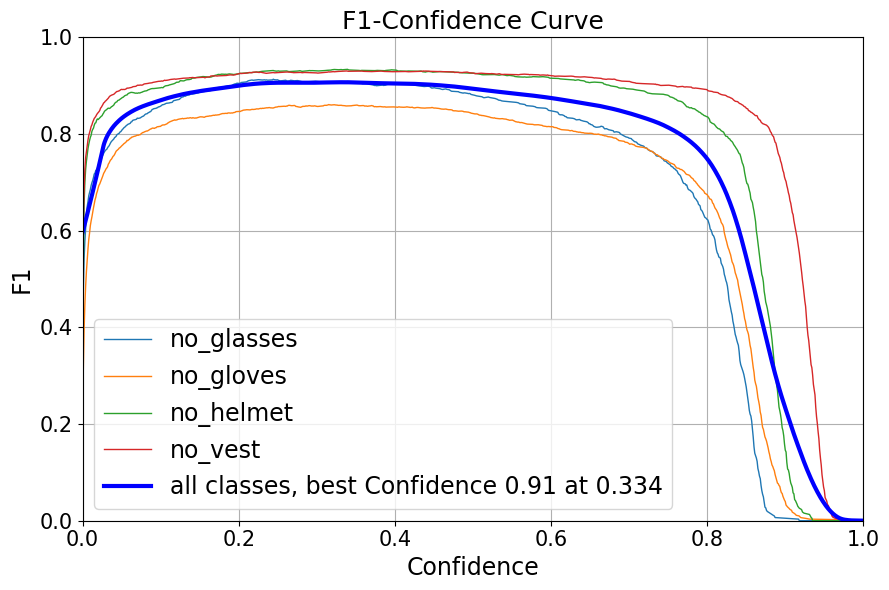

In [42]:
x, prec_values = np.linspace(0, 1, 1000), []

f1_curve = metrics.box.f1_curve
metrics.names
plot_mc_curve(x, f1_curve, metrics.names, ylabel="F1")

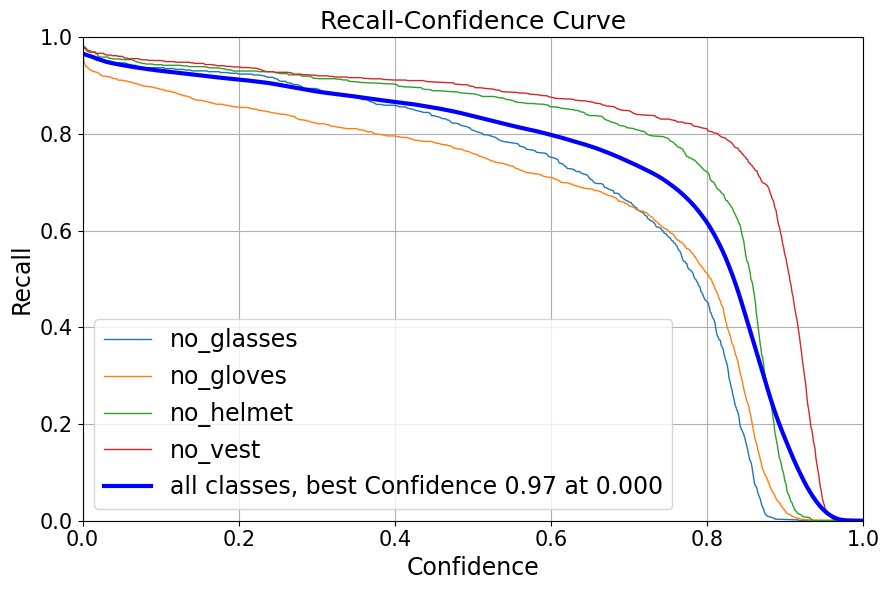

In [43]:
plot_mc_curve(x, metrics.box.r_curve, metrics.names, ylabel="Recall")

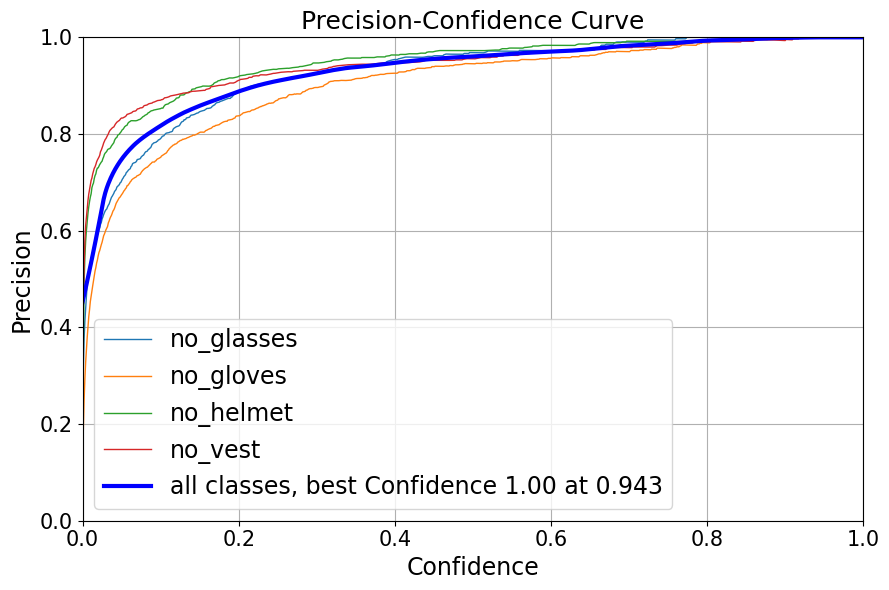

In [44]:
plot_mc_curve(x, metrics.box.p_curve, metrics.names, ylabel="Precision")

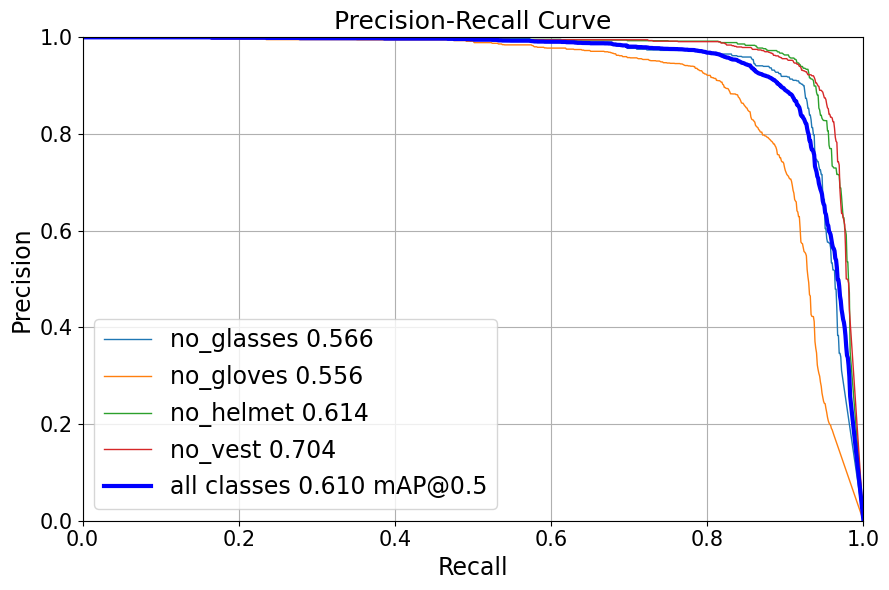

In [45]:
plot_pr_curve(x, metrics.box.prec_values, metrics.box.ap, metrics.names)

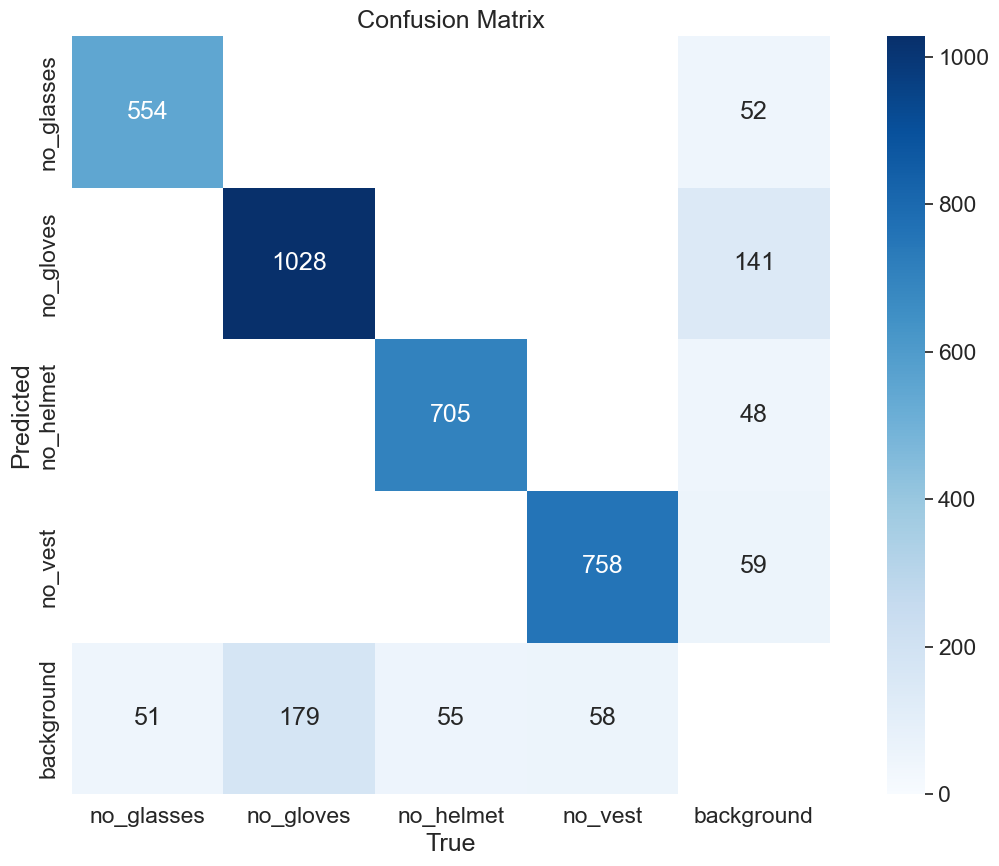

In [77]:
plot_confusion_matrix(metrics.confusion_matrix.matrix, normalize=False, names=metrics.names)

In [59]:
metrics.box.ap[0]

np.float64(0.5663956559587328)

In [49]:
metrics.curves

['Precision-Recall(B)',
 'F1-Confidence(B)',
 'Precision-Confidence(B)',
 'Recall-Confidence(B)']

Predykcja

In [5]:
# Load a model
model = YOLO('runs/detect/dataset-v2-finetune-dfllow-1/weights/best.pt')

# Define path to directory containing images and videos for inference
source = '/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images'

# Run inference on the source
results = model(source)  # generator of Results objects

predictions = 'predictions/'
if not os.path.exists(predictions):
  os.mkdir(predictions)

# Process results list
for id, result in enumerate(results, 1):
    boxes = result.boxes          # Boxes object for bounding box outputs
    masks = result.masks          # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs          # Probs object for classification outputs
    obb = result.obb              # Oriented boxes object for OBB outputs
    result.show()                 # Display to screen
    result.save(filename= predictions + 'result_' + str(id) + '.jpg')  # Save to disk


image 1/3 F:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 3 no_glassess, 4 no_glovess, 2 no_helmets, 2 no_vests, 80.1ms
image 2/3 F:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 7 no_glovess, 5 no_helmets, 4 no_vests, 68.7ms
image 3/3 F:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 3 no_glassess, 5 no_glovess, 4 no_helmets, 4 no_vests, 22.6ms
Speed: 4.3ms preprocess, 57.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


In [6]:
model = YOLO('runs/detect/dataset-v2-finetune-dfllow-1/weights/best.pt')
results = model.predict(source="/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/videos/pieknie.webm", show=False, device=0, save=True, batch=128, line_width=1, conf=0.5)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/646) F:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\pieknie.webm: 384x640 1 no_glasses, 3 no_glovess, 2 no_vests, 3.3ms
video 1/1 (frame 2/646) F:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\pieknie.webm: 384x640 1 no_glasses, 4 no_glovess, 2 no_vests, 3.3ms
video 1/1 (frame 3/646) F:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\pieknie.webm: 384x640 1 no_glasses, 4 no_glovess, 2 no_vests, 3.3ms
video 1/1 (frame 4/646) F:\PRACA_MAGISTER

In [2]:
import time

In [3]:
model = YOLO('runs/detect/dataset-v2-22/weights/best.pt')
results = model.predict(source='/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/images', show_conf=False, show_labels=False, device=0, save=True, conf=0.334)


image 1/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\spacer-seniora1-2048x1362.jpg: 448x640 2 no_glassess, 4 no_glovess, 2 no_helmets, 2 no_vests, 74.5ms
image 2/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-engineers-railway-survey-wearing-safety-uniform-under-conversation-document-and-tablet-on-hand-2468533629.jpg: 480x640 2 no_glovess, 73.6ms
image 3/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resource-team-talking-to-a-candidate-during-a-job-interview-in-the-office-2316131879.jpg: 480x640 3 no_glassess, 4 no_glovess, 5 no_helmets, 3 no_vests, 18.0ms
image 4/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-human-resources-commission-interviewing-male-applicant-in-office-2409886423.jpg: 480x640 3 no_glassess, 3 no_glovess, 5 no_helmets, 4 no_vests, 19.3ms
image 5/5 f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\images\stock-photo-latin-woman-with-curly-hair-wearing-a-hard-hat-and-reflective-vest-stands-confidently-in-a-city-2576103397.j

In [4]:
model = YOLO('runs/detect/dataset-v2-22/weights/best.pt')
start_time = time.time()
results = model.predict(source="/PRACA_MAGISTERSKA/DATASETS/PREDYKCJA/videos", show=False, device=0, save=True, show_conf=False, show_labels=False, conf=0.334, batch=64)
end_time = time.time()



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/4 (frame 1/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 1 no_glasses, 5 no_helmets, 5 no_vests, 2.0ms
video 1/4 (frame 2/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 1 no_glasses, 5 no_helmets, 5 no_vests, 2.0ms
video 1/4 (frame 3/227) f:\PRACA_MAGISTERSKA\DATASETS\PREDYKCJA\videos\las.webm: 352x640 1 no_glasses, 5 no_helmets, 5 no_vests, 2.0ms
video 1/4 (frame 4/227) f:\PRACA_MAGISTERSKA\DATASETS

In [5]:
frame_count=1432
total_time = end_time - start_time
avg_fps = frame_count / total_time if total_time > 0 else 0

In [6]:
avg_fps

84.75342716076713